<a href="https://colab.research.google.com/github/aleenalasarin/Machine-Learning-Project/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import pandas as pd
df=pd.read_excel('/content/poly.xlsx')   #excel file
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [107]:
df.head()

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [108]:
df.tail()


,sno,Temperature,Pressure
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [109]:
df.columns

Index(['sno', 'Temperature', 'Pressure'], dtype='object')

In [110]:
df.drop(['sno'],axis=1,inplace=True)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [111]:
df.isna().sum()

Temperature    0
Pressure       0
dtype: int64

In [112]:
df.dtypes

Temperature      int64
Pressure       float64
dtype: object

In [113]:
x=df.iloc[:,:-1]
x

,Temperature
0,0
1,20
2,40
3,60
4,80
5,100


In [114]:
y=df.iloc[:,-1]
y

0    0.0002
1    0.0012
2    0.0060
3    0.0300
4    0.0900
5    0.2700
Name: Pressure, dtype: float64

In [115]:
# no need of training and testing data because there is only 6 sample
# we can use this complete data for model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)


LinearRegression()

In [116]:
# prediction
y_pred=model.predict(x)
y_pred  # machine predicted value using simple regression

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

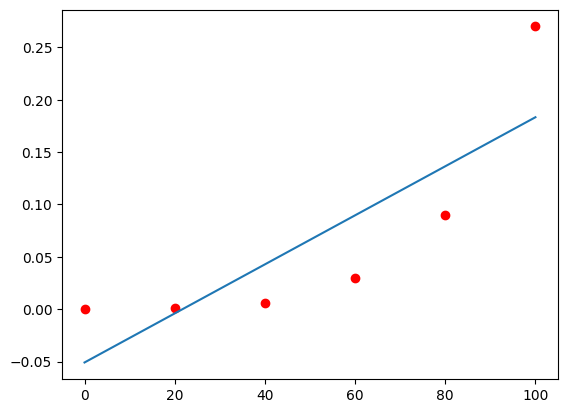

In [117]:
# scatter plot (x,y)
import matplotlib.pyplot as plt
plt.scatter(x,y,color='r')
plt.plot(x,y_pred)  #plot(x,y_pred)

In [118]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("error is",mean_absolute_percentage_error(y,y_pred))  #here error is high

error is 44.775078189300416


In [119]:
print("r2score is",r2_score(y,y_pred))

r2score is 0.690349972603981


In [120]:
# polynomial regression
# degree=2
# changing the x degree(which is independent variable)
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2`)
x_poly=poly.fit_transform(x)  #converting x
x_poly
# now input is in x_poly
# here x is expanded into 3 features
# converted to 3 input features

array([[1.0e+00, 0.0e+00, 0.0e+00],
       [1.0e+00, 2.0e+01, 4.0e+02],
       [1.0e+00, 4.0e+01, 1.6e+03],
       [1.0e+00, 6.0e+01, 3.6e+03],
       [1.0e+00, 8.0e+01, 6.4e+03],
       [1.0e+00, 1.0e+02, 1.0e+04]])

In [121]:
# model creation
model1=LinearRegression()
model1.fit(x_poly,y)
y_poly=model1.predict(x_poly)
y_poly  # machine predicted value using polynomial regression

array([ 0.01555, -0.01731, -0.01032,  0.03652,  0.12321,  0.24975])

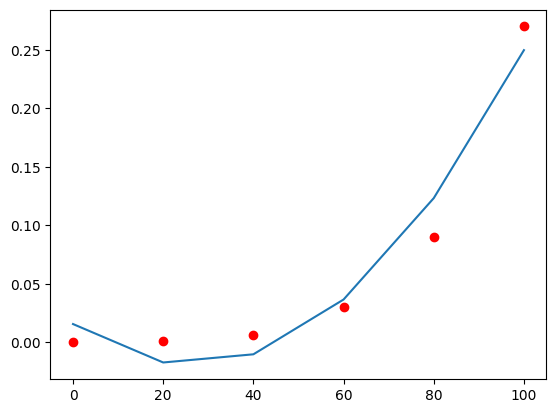

In [122]:
plt.scatter(x,y,color='r')  #we cant plot x_poly because there will be so many independent variable so we cant plot
plt.plot(x,y_poly)  #x,predicted value(polynomial regression)

In [123]:
# performance evaluation
print("MAE is",mean_absolute_percentage_error(y,y_poly))


MAE is 15.926055555558056


In [124]:
print("R2 score is",r2_score(y,y_poly))

R2 score is 0.9568461098911795


In [ ]:
# if we increase degree overfitting may occur